In [54]:
import numpy as np #it helps in data storage and element wise operatons and integration with matplot lib aur also in data manipulation like split and merge etc
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import  matplotlib.pyplot as plt
%matplotlib inline


In [55]:
telco_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [56]:
telco_data.head() #head returns top 5 rows of that full data with al the colums included 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
telco_data.shape  #shape attribute gives you the numebrof rows adn column in pandas

(7043, 21)

In [58]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [59]:
telco_data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
telco_data.describe() #basic descriptive statistical data, only the flot and int will be described others won't be because of onjec datatype

#here 25 % signifis that 25 percent of cutomers have tensusse less than 29 months
# and mean or average monthly charges are 64.76 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
#conversion of catagorical variabel into numerical varibel , like apne paas meobject datatypes hain so we can't simply work with them , kuch na kuch known datatype shoudl be there to make them work 

No     5174
Yes    1869
Name: Churn, dtype: int64

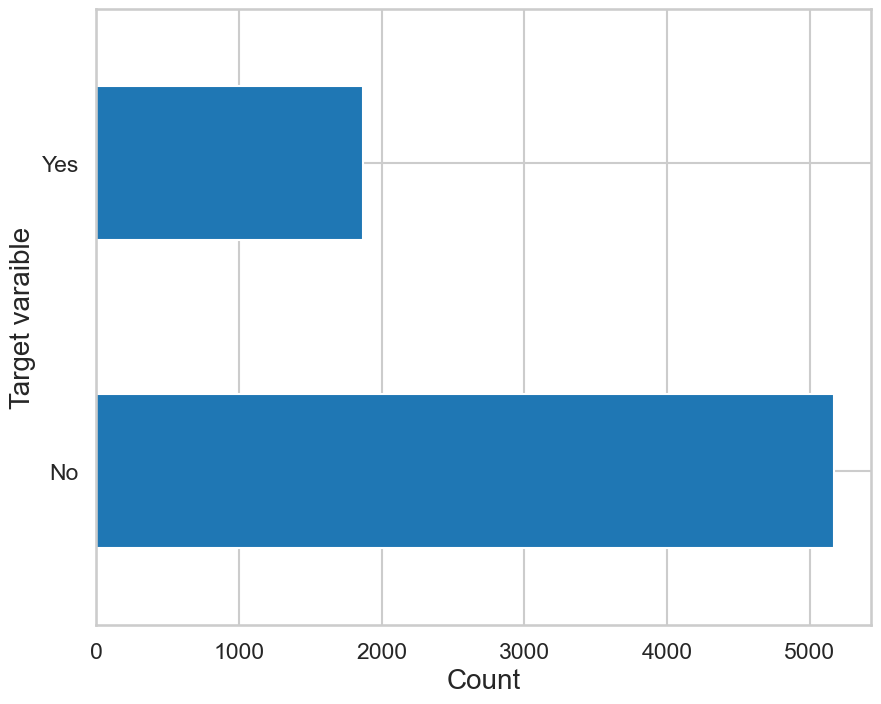

In [62]:
telco_data['Churn'].value_counts().plot(kind = 'barh', figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Target varaible")
telco_data["Churn"].value_counts()

In [63]:
#percetage of churners 
100*telco_data["Churn"].value_counts() / len(telco_data["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [64]:
#now ont thign you need to undestand is that ki bhai , the data disteibution iis bery uneven 
#what does that mean?
#it means that , ki there are mroe peopel who ds not churn thatn people who chrun 
#why is this important?
#it's importatn because of the simple fact that 
#if your traijnig dataitself is biased towards being NON churners then obviously model will give more results as non churners 
#our goal should be that meodel shoudl evalute equal amoutn of churners and non churners 
# how wil we do that?
#for that we'll need to go through one trasformation 
#either we choose leese numebr of NOn churners and equate to the numebr of churners and the train model on that smaller amoutn of data 
# OR we can simply Upscale the model adding a few more records to the churner datacategory , and then training the model on that larger than origial dataset mode
#intretingly generallly second approach of uscallign give your a better accuracy as there is intrinsicaly more data availble to be trained on as supoprser to decreasing the number ofday and then qualtoing both in the lower end of the picture 


In [65]:
telco_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


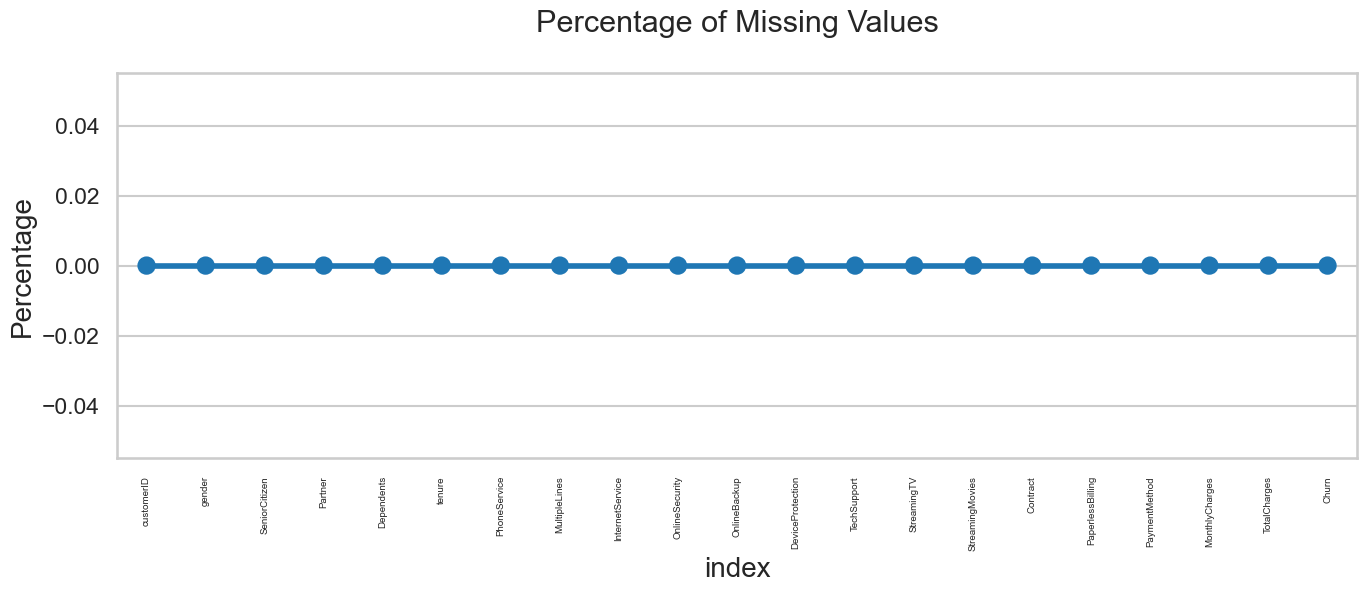

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
missing = pd.DataFrame((telco_data.isnull().sum() * 100) / telco_data.shape[0]).reset_index()

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

telco_data.head()


In [67]:
#if you found that multiple nulls are there even after nulls that column hold significance 
#then you'll have to fill this up 
# how ?
#you can use the methords like 
# averaging of the values 
# implementign timeseries forcasting model 
# rolling window methords ( takign average only form the data that is related to that cell )
#also we can use regressing to predic tthe missing valeus ( study this in detail ) 

In [68]:
# now there are mnay object datatypes toh npw ;et's convert them to numebric 

### Data Cleaning



In [69]:
telco_data_copy = telco_data.copy()


In [70]:
telco_data_copy.TotalCharges = pd.to_numeric(telco_data_copy.TotalCharges, errors = 'coerce')

In [71]:
telco_data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
# now we found ki there are 11 missing values in totalcharges column as soona s we converted it into numeric datatype 

In [73]:
telco_data_copy.loc[telco_data_copy['TotalCharges'].isnull() == True]

# telco data copy me locate karo jahain totla chaeges wlae column  me null entries hain 
#isnull output is boolean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [74]:
#NAN values means not a number

In [75]:
#as the number of these records is very low hence we can drop them  sirf 0.15 percentaeg type

telco_data_copy.dropna(how = 'any', inplace = True)
# Remove rows with any missing values from the 'telco_data_copy' DataFrame


In [76]:
labels = [ " {0} - {1}".format(i,i+11) for i in range (1,72,12)]

telco_data_copy['tenure_groups'] = pd.cut(telco_data_copy.tenure, range(1, 80, 12), right = False , labels = labels)

In [77]:
telco_data_copy['tenure_groups'].value_counts()


 1 - 12     2175
 61 - 72    1407
 13 - 24    1024
 25 - 36     832
 49 - 60     832
 37 - 48     762
Name: tenure_groups, dtype: int64

In [78]:
#drop column customerID and tenure
telco_data_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [79]:
#BASIC UNIVARIATE ANALYSIS AFTER THE DATA CLEANING TO UNDERTSTAND DATA LITTLE BETTER 

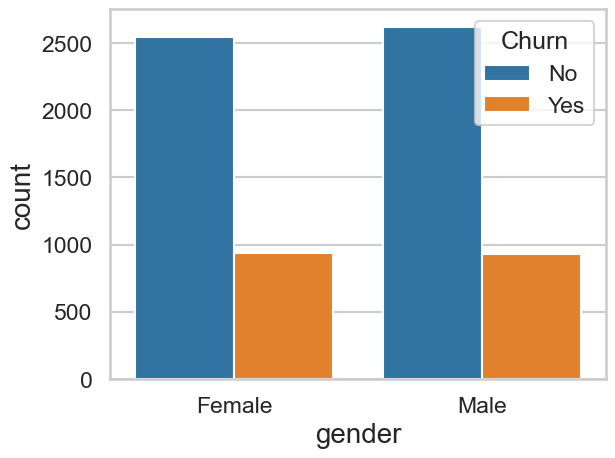

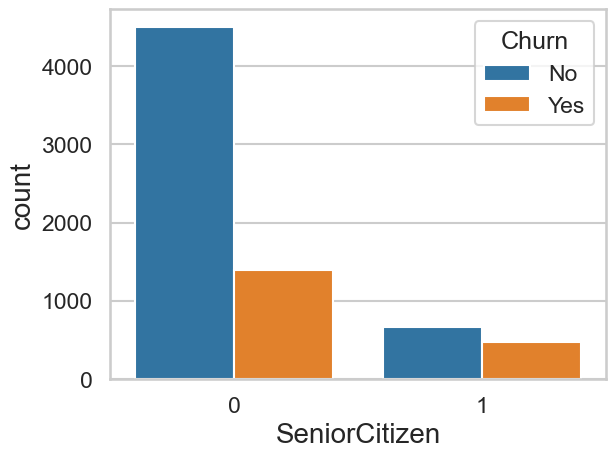

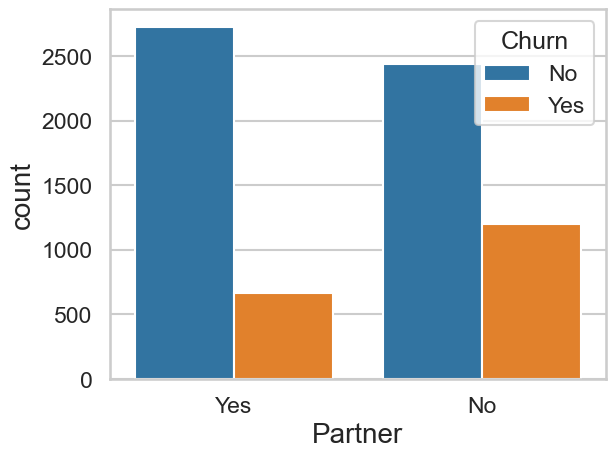

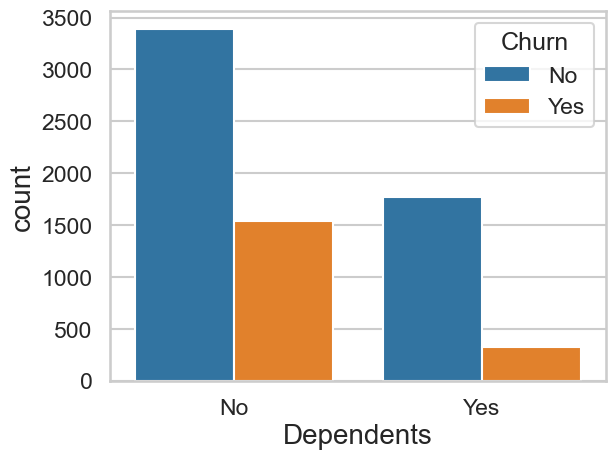

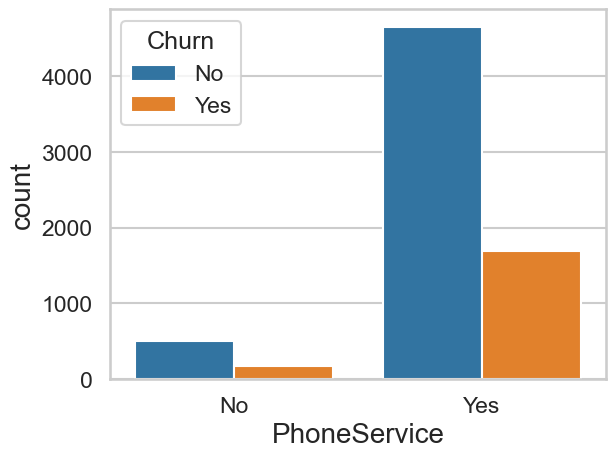

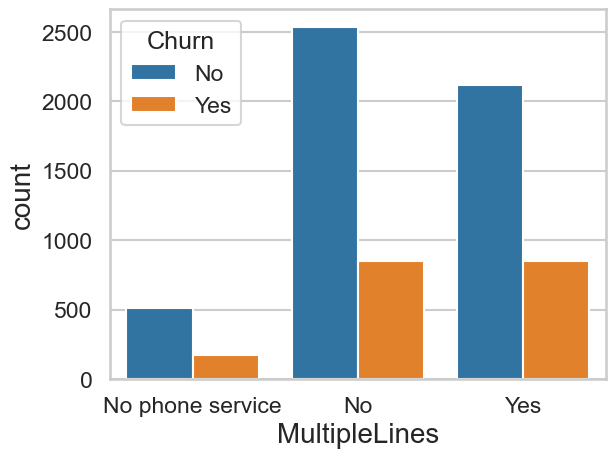

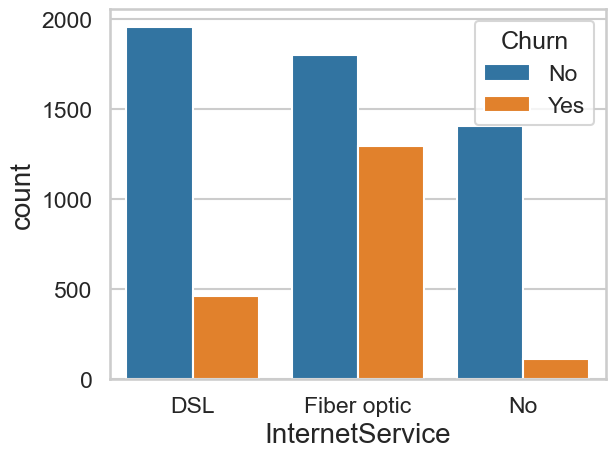

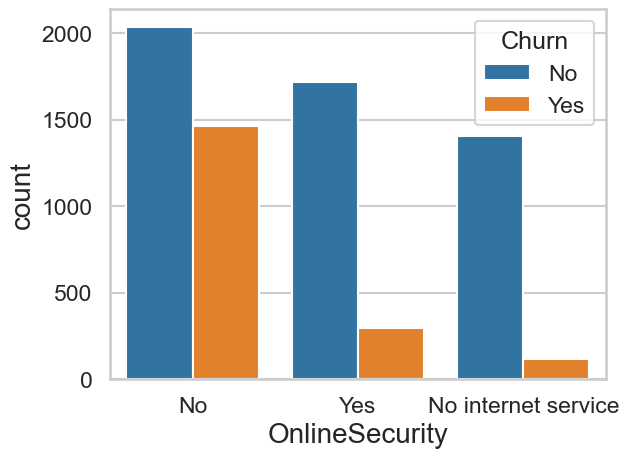

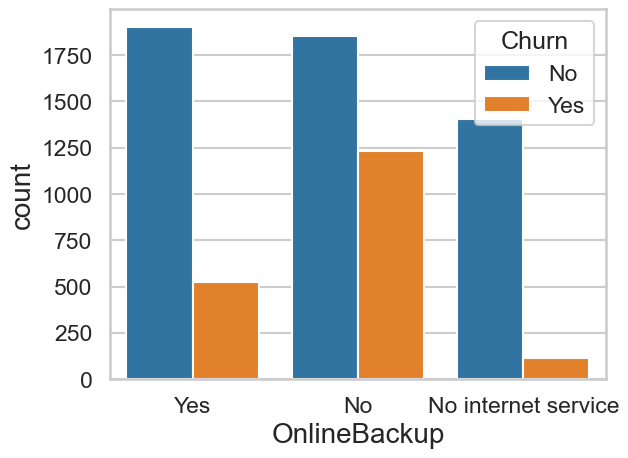

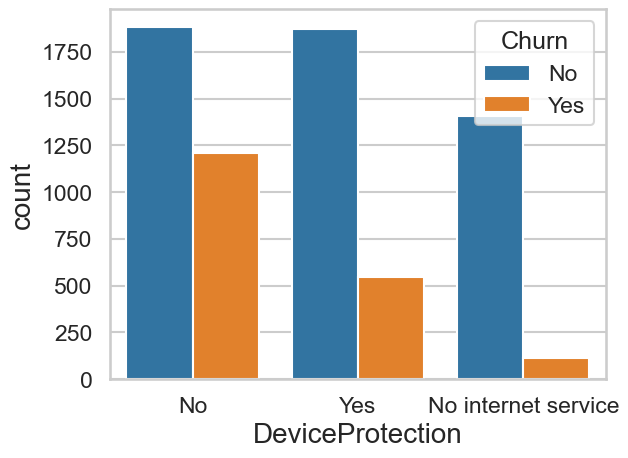

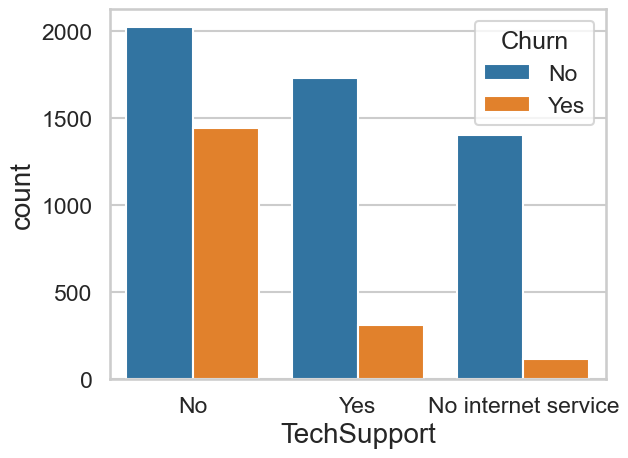

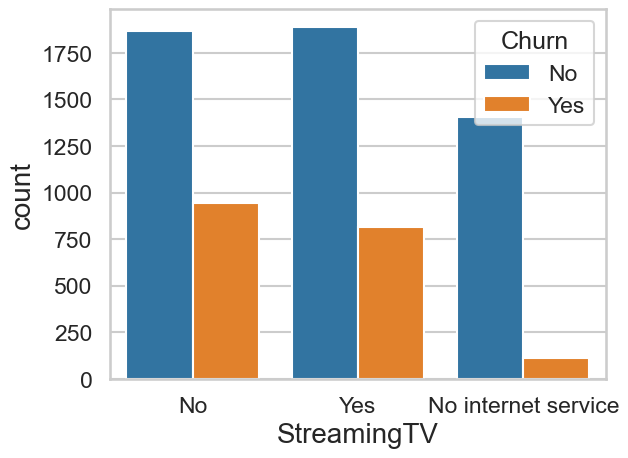

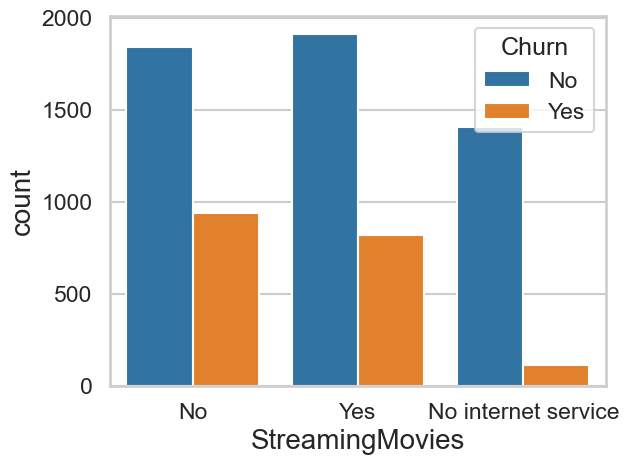

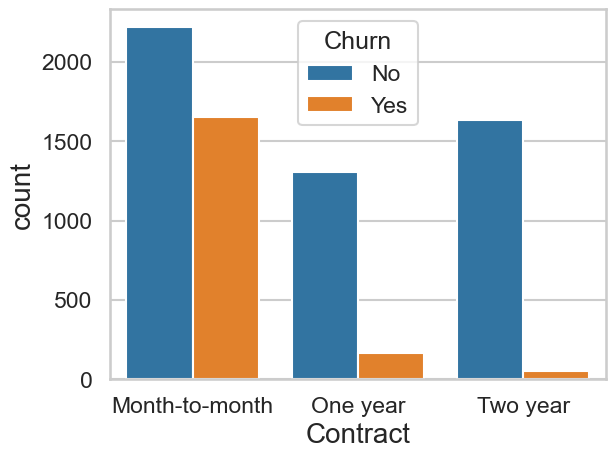

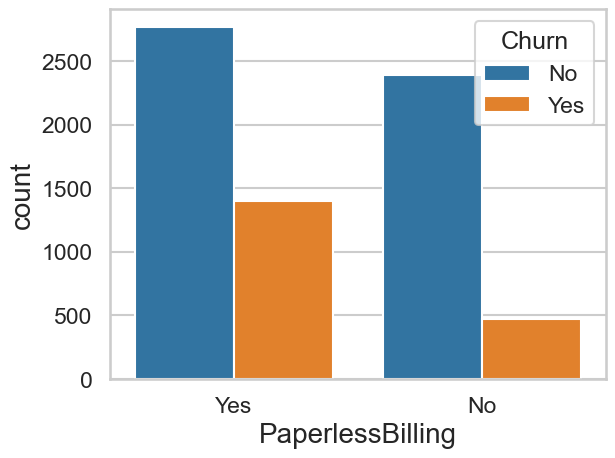

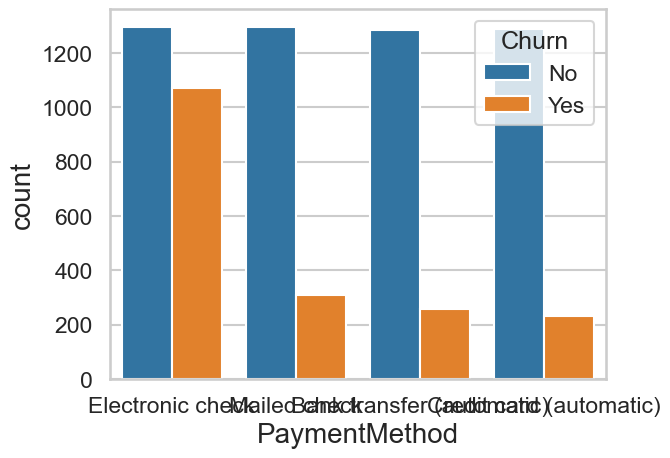

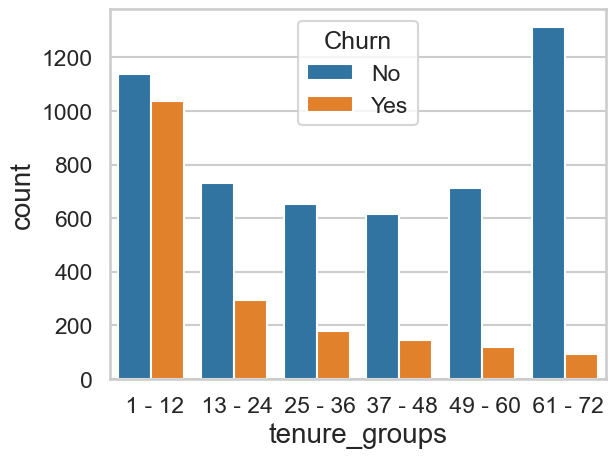

In [80]:
for i, predictor in enumerate(telco_data_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data_copy, x=predictor, hue='Churn')

In [81]:

telco_data_copy.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [82]:
# creating dummy varaibles , 

# ab dekho hota kya hai ki , we have catagorical variables , ab unko hume convert karna hain  in the numerical type variabels for the computer to understand and standardize the whole database 
# but ab problem yeh hain ki agar mene for example streming feature me , 0 for no internet , 1 for no and 2 for yes standardize kar diya 
# so just bcz computers understand the datga in the numerical form they will be more biased towards yes just because it's labeles as 2 to convert it into numerica 
# hence we'll create 3 more features out of just one feature 
#streaming_ yes , streaming _no , streaming _nointernet and bas inke toggles me we'll have 0 and 1's
telco_data_dummies = pd.get_dummies(telco_data_copy)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_groups_ 1 - 12,tenure_groups_ 13 - 24,tenure_groups_ 25 - 36,tenure_groups_ 37 - 48,tenure_groups_ 49 - 60,tenure_groups_ 61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


<Axes: >

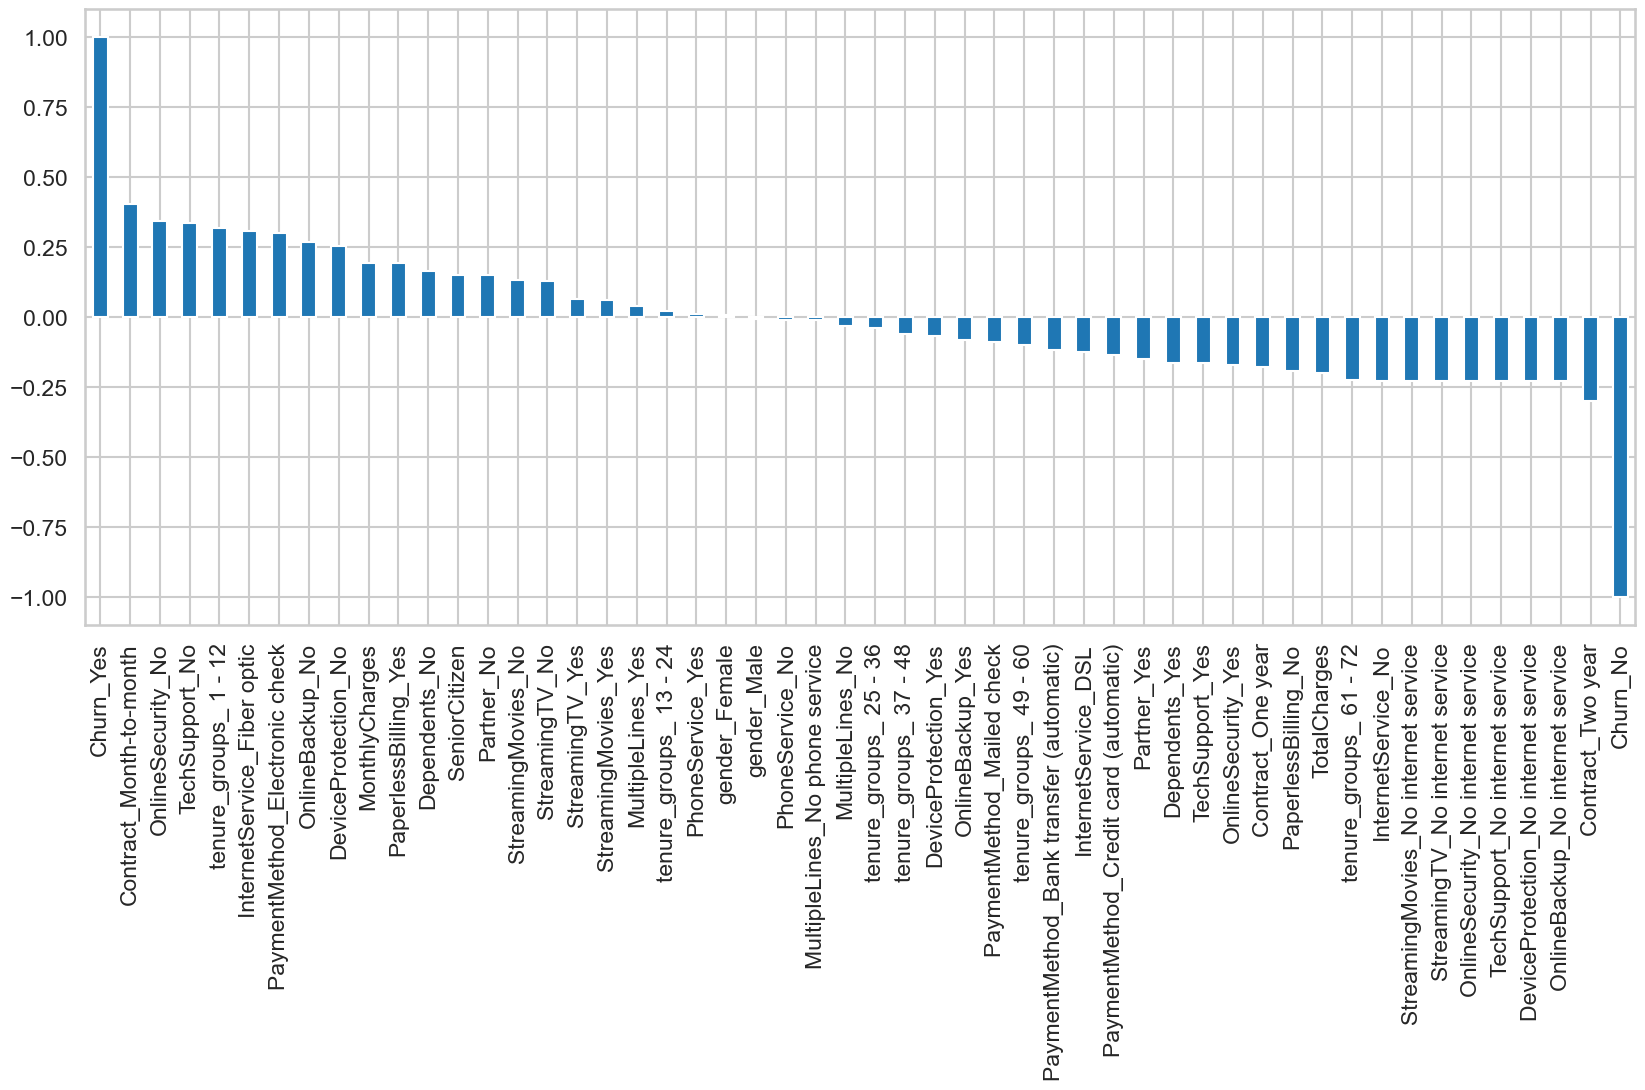

In [83]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

Derived Conclusions form Basic EDA , The churn has a very high corelation with the Contract_Month_month typre users and ternure 1-12 users who take the plan less than 1 year , and cutomers who are nto given tech support , and finnaly the ppeople who try fiber optics services formteh provider becuase these see, to be people who aremillenials and are ready to try new feature and services tho very easy on CAC are very hard to retain ....

LOW ; on the other hand people who don't use internet services in general are more loyal, could be catogarised in conditionally oyal custoemr s, 

starting BIVARIATE ANALYSIS 


In [90]:






telco_data_copy['Churn'] = np.where(telco_data_copy.Churn == 'Yes',1,0)
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [91]:
new_df1_target0=telco_data_copy.loc[telco_data_copy["Churn"]==0]
new_df1_target1=telco_data_copy.loc[telco_data_copy["Churn"]==1]

In [92]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()


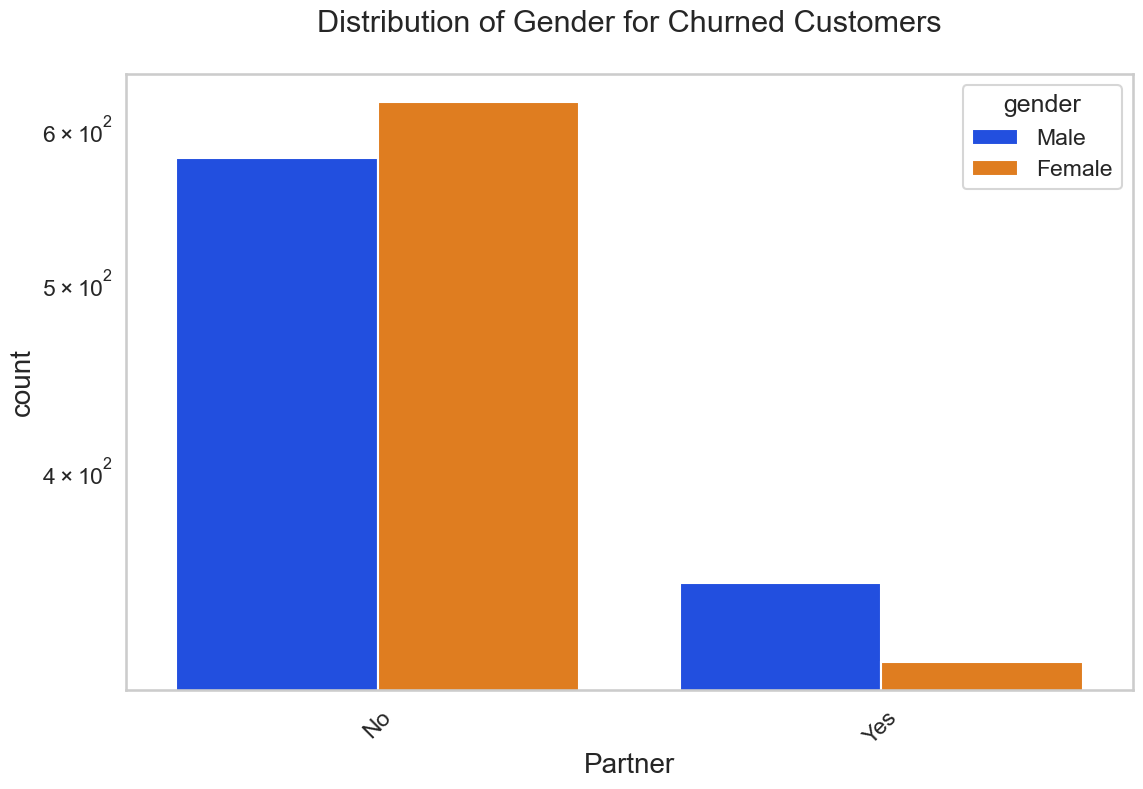

In [93]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')
